# Python в инженерных расчетах. Лекция 03.
<hr style="border:2px solid gray">

План занятия:
1. Загрузить и визуализировать график истинное напряжение истинная дефорация;
2. Расчитать модуль Юнга для этой стали по данным эксперимента;
3. Определить условный предел текучести для этой стали.

In [14]:
# импортируем библиотеку для визаулизации данных
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

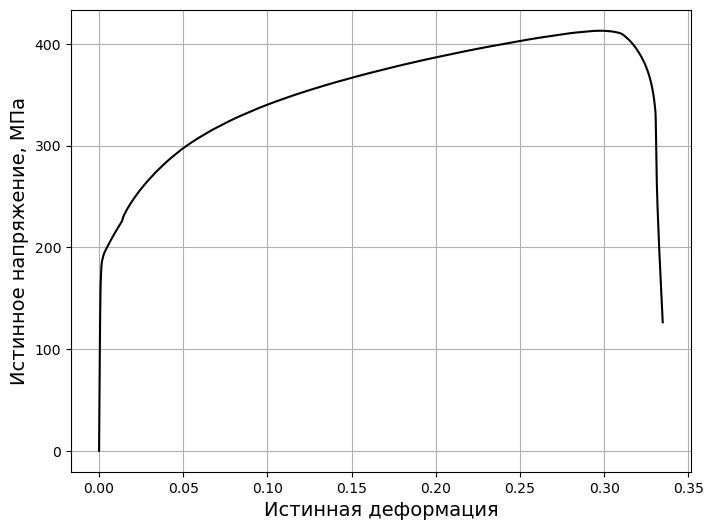

In [15]:
strain = [] # пустой список для записи данных о деформации
stress = [] # пустой список для записи данных о силе

# открываем файл с данными и считываем их в списки strain и stress
with open ('../data/true_stress_strain.txt', 'r') as file: 
    for line in file:                                    
        stress_strain = line.split('\t')                  
        strain.append(float(stress_strain[0]))           
        stress.append(float(stress_strain[1])) 

# визуализируем результат
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.figure(figsize=(8, 6)) # размер графика в дюймах
plt.plot (strain, stress, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Истинная деформация', fontsize = 14)
plt.ylabel ('Истинное напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

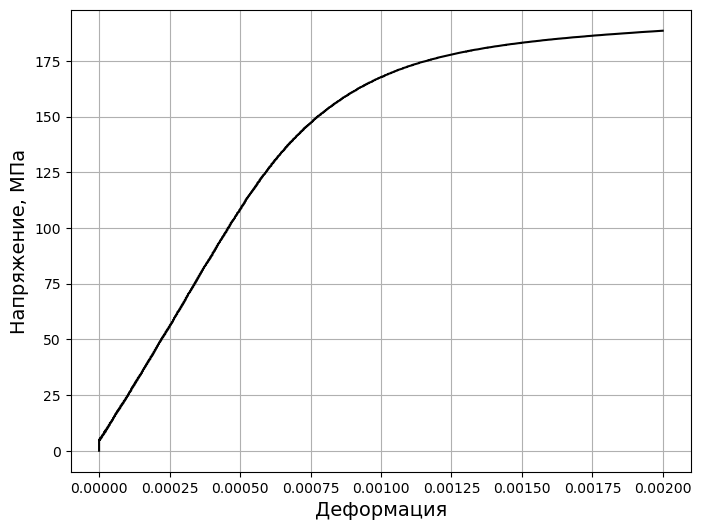

In [16]:
# посмотрим поближе на упруго-пластическую часть графика. 
elastic_limit = 0.002 # условно примем, что упругая зона расположена слева от точки 0.002 (0.2%) по оси деформации
strain_elastic_plastic = [0] # пустой список, куда будем записывать упруго-пластические деформации
stress_elastic_plastic = [0] # пустой список, куда будем записывать упруго-пластические напряжения

for i in range(1, len(strain)):
    if strain[i] <= elastic_limit:
        strain_elastic_plastic.append(strain[i])
        stress_elastic_plastic.append(stress[i])
    else: break

# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic, stress_elastic_plastic, '-', color = 'black')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()

<br>
Модуль упругости $E$ определяется методом линейной регрессии через начало координат по формуле:

$$
\begin{flalign}
E = \frac{\sum (\sigma_{\text{true } i} \cdot \epsilon_{\text{true } i})}{\sum (\epsilon_{\text{true } i}^2)} &&
\end{flalign}
$$

где:  
- $\sigma_{\text{true } i}$ — истинное напряжение в $i$-й точке упругой зоны, МПа  
- $\epsilon_{\text{true } i}$ — истинная деформация в $i$-й точке
<br>


In [17]:
numerator = 0.0 # сюда будем накапливать сумму в числителе
denominator = 0.0 # сюда в знаминателе
i=0
while strain[i] <= 0.0005:
    sigma = stress[i]
    epsilon = strain[i]
    numerator += sigma * epsilon
    denominator += epsilon * epsilon
    i+=1

if denominator != 0:
    E = numerator / denominator
else:
    E = 0
print (f'Модуль Юнга = {E}, МПа')

Модуль Юнга = 221900.12249023042, МПа


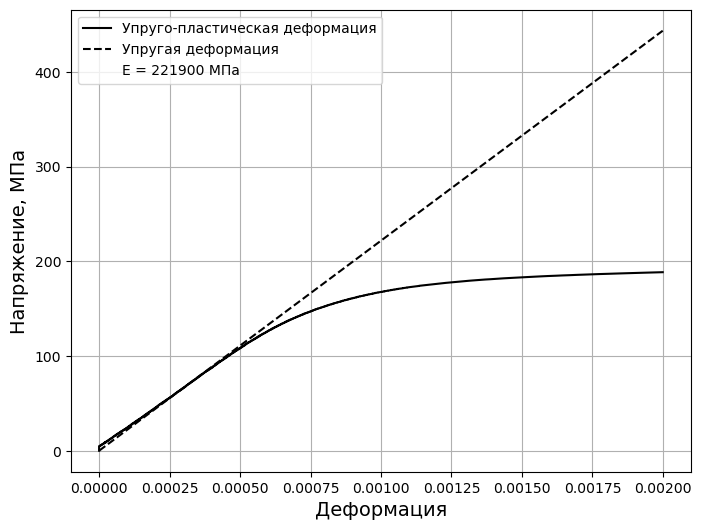

In [18]:
# Определяем график упругой деформации
stress_elastic = [0]
strain_elastic = [0]
i=0
while strain[i] <= elastic_limit:
    strain_elastic.append(strain[i])
    stress_elastic.append(E*strain[i])
    i+=1
# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain_elastic_plastic, stress_elastic_plastic, '-', color = 'black', label = 'Упруго-пластическая деформация')
plt.plot (strain_elastic, stress_elastic, '--', color = 'black', label = 'Упругая деформация')
plt.plot ([], [], ' ', label = f'E = {round(E)} МПа')
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
# добавляем название каждой кривой
plt.legend()

In [19]:
# Предел текучести материала ищем из расчета, что остаточная пластическая деформацию в этой точке равна 0.2% или 0.002
yield_stress = 0
plastic_strain = 0
i=0
while plastic_strain<=elastic_limit:
    plastic_strain = strain[i] - stress[i]/E
    yield_stress = stress[i]
    i+=1

print (f'Предел текучести = {yield_stress} МПа')
    

Предел текучести = 193.46333382139503 МПа


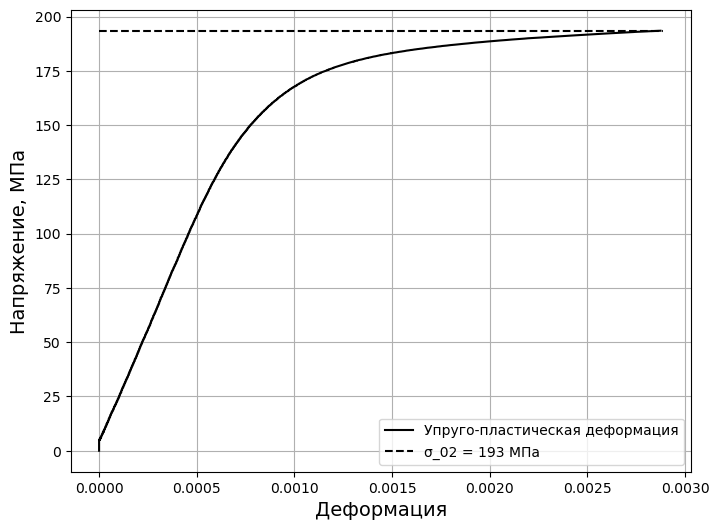

In [20]:
# Посмотрим что получилось
# создаем "базу" для график
plt.figure(figsize=(8, 6))
plt.plot (strain[0:i], stress[0:i], '-', color = 'black', label = 'Упруго-пластическая деформация')
plt.plot ([strain[0], strain[i]], [yield_stress, yield_stress], '--', color = 'black', label = f'σ_02 = {round(yield_stress)} МПа')
plt.plot
# Добавляем названия осей
plt.xlabel ('Деформация', fontsize = 14)
plt.ylabel ('Напряжение, МПа', fontsize = 14)
# добавляем для красоты сетку
plt.grid()
# добавляем название каждой кривой
plt.legend()